In [1]:
%store -r df

In [10]:
## removing outliers 
df2 = df 
def three_sd_range(series):
    mean = series.mean()
    sd = series.std()
    low = mean - 3*sd
    high = mean + 3*sd

    return (low, high)

for col_name in ['duration', 'price']:
    lower, upper = three_sd_range(df2[col_name])
    has_outlier = (df2[col_name].min() < lower) or (df2[col_name].max() > upper)
    print(col_name + ' has outliers: ' + str(has_outlier))

    if has_outlier:
        # Remove outliers
        curr_length = df2[col_name].count()
        df2 = df2[ (df2[col_name]>=lower) & (df2[col_name]<=upper)]
        new_length = df2[col_name].count()
        row_removed = curr_length - new_length
        print(str(row_removed) + ' row will be removed from ')

    print()



duration has outliers: True
722 row will be removed from 

price has outliers: True
595 row will be removed from 



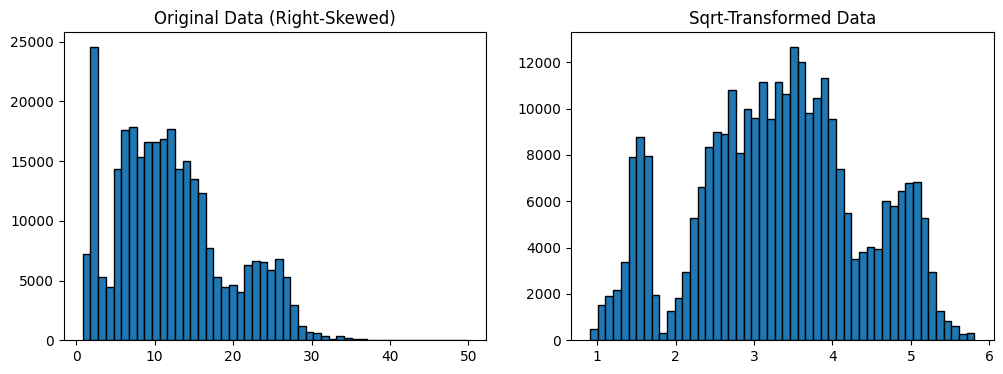

In [18]:
## log transforming the right skewed data: duration and price
import numpy as np
import matplotlib.pyplot as plt
sqrt_transformed_data = np.sqrt(df2['duration'])
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['duration'], bins=50, edgecolor='black')
plt.title('Original Data (Right-Skewed)')

plt.subplot(1, 2, 2)
plt.hist(sqrt_transformed_data, bins=50, edgecolor='black')
plt.title('Sqrt-Transformed Data')
plt.show()
df2['duration_sqrt'] = np.sqrt(df2['duration'])

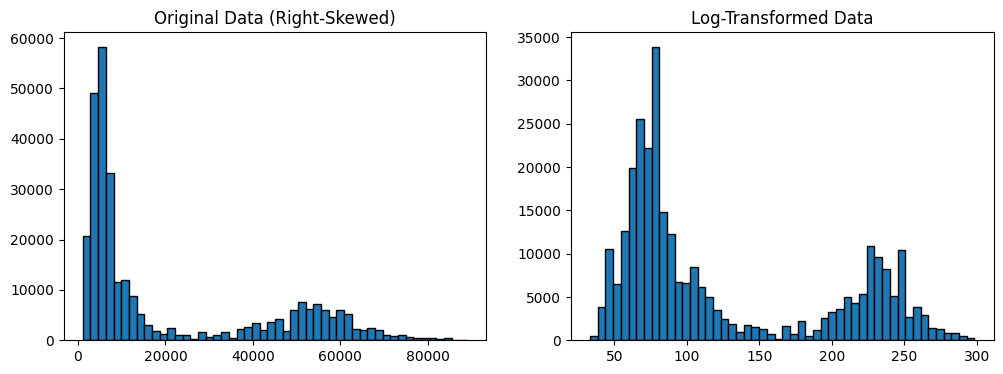

In [17]:
log_transformed_data = np.sqrt(df2['price'])
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df2['price'], bins=50, edgecolor='black')
plt.title('Original Data (Right-Skewed)')

plt.subplot(1, 2, 2)
plt.hist(log_transformed_data, bins=50, edgecolor='black')
plt.title('Log-Transformed Data')
plt.show()